## 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# 데이터셋 불러오기
train = pd.read_csv('/content/drive/My Drive/UNSW_NB15/UNSW_NB15_training-set.csv')
test = pd.read_csv('/content/drive/My Drive/UNSW_NB15/UNSW_NB15_testing-set.csv')
data = pd.concat([train, test])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt  

In [ ]:
data.shape

(257673, 45)

## 전처리

In [ ]:
# 불필요한 컬럼 제거
data.drop(['id'], axis=1, inplace=True)

In [ ]:
data[data['service']=='-']

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
5,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
data.shape

(257673, 44)

In [ ]:
import numpy as np

data['service'].replace('-',np.nan,inplace=True)
data.dropna(inplace=True)

<ipython-input-8-b5dc8d97be50>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service'].replace('-',np.nan,inplace=True)


In [ ]:
data.shape

(116352, 44)

In [ ]:
import chardet

with open('/content/drive/My Drive/UNSW_NB15/UNSW-NB15_features.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
# 파일 읽기: 인코딩 방식 지정
features = pd.read_csv('/content/drive/My Drive/UNSW_NB15/UNSW-NB15_features.csv', encoding='Windows-1252')

# 데이터 확인
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
# 모든 데이터 타입 컬럼 선택
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:
# 데이터셋의 실제 컬럼들과 교차하여 유효한 컬럼만 선택
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [ ]:
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116352 entries, 3 to 82194
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                116352 non-null  float64
 1   proto              116352 non-null  object 
 2   service            116352 non-null  object 
 3   state              116352 non-null  object 
 4   spkts              116352 non-null  int64  
 5   dpkts              116352 non-null  int64  
 6   sbytes             116352 non-null  int64  
 7   dbytes             116352 non-null  int64  
 8   rate               116352 non-null  float64
 9   sttl               116352 non-null  int64  
 10  dttl               116352 non-null  int64  
 11  sload              116352 non-null  float64
 12  dload              116352 non-null  float64
 13  sloss              116352 non-null  int64  
 14  dloss              116352 non-null  int64  
 15  sinpkt             116352 non-null  float64
 16  dinpkt  

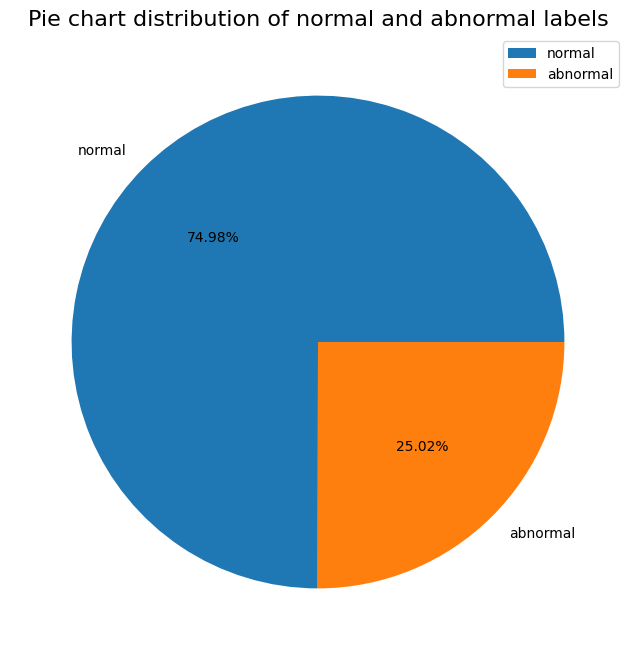

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

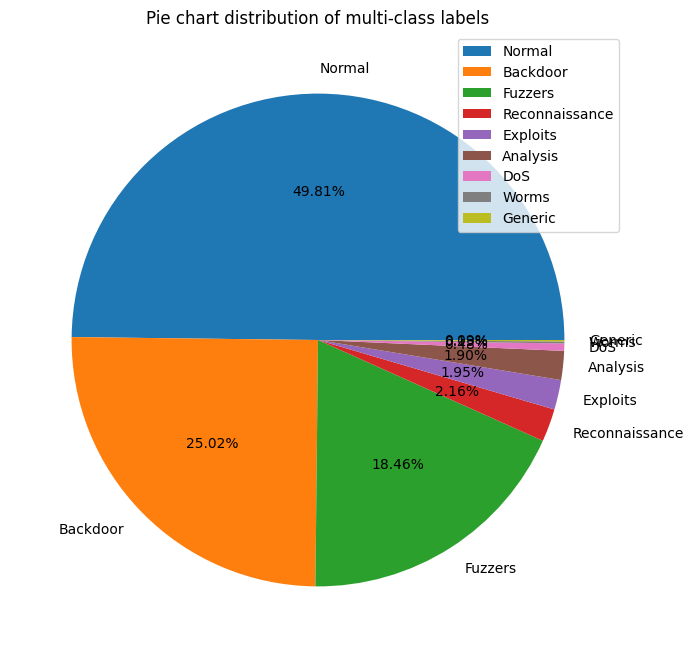

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

## One hot encoding

In [ ]:
num_col = data.select_dtypes(include='number').columns

cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
17,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
21,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.shape

(116352, 44)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.shape

(116352, 41)

## 정규화

In [ ]:
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[num_col] = scaler.fit_transform(data[num_col])

In [ ]:
data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,0.218309,-0.043517,-0.039182,-0.053634,-0.073975,-0.632672,-1.059702,1.560524,-0.617451,-0.212384,...,-0.825661,-0.726429,5.666154,5.649638,-0.288988,-0.799309,-0.900377,0.0,Normal,0
11,0.320131,0.231462,0.080274,0.180799,-0.065828,-0.632501,-1.059702,1.560524,-0.614822,-0.207427,...,-0.825661,-0.798004,-0.165550,-0.165479,-0.288988,-0.895515,-0.900377,0.0,Normal,0
15,-0.197859,-0.098512,-0.128774,-0.055697,-0.078325,2.336451,0.812899,-0.712290,2.852591,-0.215857,...,-0.825661,-0.654854,-0.165550,-0.165479,-0.288988,-0.799309,-0.900377,0.0,Normal,0
17,-0.100463,-0.054516,-0.069046,-0.052658,-0.072133,-0.632497,-1.059702,1.560524,-0.617288,-0.195700,...,-0.825661,-0.798004,-0.165550,-0.165479,0.724771,-0.895515,-0.755581,0.0,Normal,0
21,-0.114208,-0.054516,-0.083978,-0.052077,-0.076811,-0.632490,0.812899,1.560524,-0.617218,-0.210375,...,-0.825661,-0.869578,-0.165550,-0.165479,0.724771,-0.799309,-0.755581,0.0,Normal,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 다중분류에서 Normal 클래스 제거 (이미 data_multi에 반영됨)
data_multi = data[data['attack_cat'] != 'Normal']  # Normal 제외

# 다중분류 라벨 인코딩 (attack_cat)
label_encoder = LabelEncoder()
data_multi['attack_cat_encoded'] = label_encoder.fit_transform(data_multi['attack_cat'])

# 이중분류 타겟 (label: 0 -> 정상, 1 -> 비정상)
y_binary = data['label']

# 다중분류 타겟 (공격 유형 포함)
y_multi = data_multi['attack_cat_encoded']  # 다중분류는 data_multi를 기반으로 사용

# 입력 데이터에서 타겟 컬럼 제거
X_binary = data.drop(['label', 'attack_cat'], axis=1)  # 이중분류용
X_multi = data_multi.drop(['label', 'attack_cat', 'attack_cat_encoded'], axis=1)  # 다중분류용

# 데이터 분할 (이중분류)
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.2, stratify=y_binary, random_state=42
)

# 데이터 분할 (다중분류)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, stratify=y_multi, random_state=42
)

# 확인
print("이중분류 - 훈련 데이터 크기:", X_train_binary.shape)
print("다중분류 - 훈련 데이터 크기:", X_train_multi.shape)
print("다중분류 - 클래스 분포:")
print(data_multi['attack_cat'].value_counts())

<ipython-input-31-8682be5b139f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_multi['attack_cat_encoded'] = label_encoder.fit_transform(data_multi['attack_cat'])


이중분류 - 훈련 데이터 크기: (93081, 39)
다중분류 - 훈련 데이터 크기: (69791, 39)
다중분류 - 클래스 분포:
attack_cat
Generic           57956
Exploits          21480
DoS                2508
Fuzzers            2266
Reconnaissance     2207
Analysis            564
Worms               148
Backdoor            110
Name: count, dtype: int64


## 클래스 불균형 해결: SMOTE

In [ ]:
# 이중분류 클래스 분포 확인
print("이중분류 타겟 값 분포:")
print(y_binary.value_counts())

# 다중분류 클래스 분포 확인
print("\n다중분류 타겟 값 분포:")
print(y_multi.value_counts())

이중분류 타겟 값 분포:
label
1    87239
0    29113
Name: count, dtype: int64

다중분류 타겟 값 분포:
attack_cat_encoded
5    57956
3    21480
2     2508
4     2266
6     2207
0      564
7      148
1      110
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# 이중분류에서 SMOTE 적용
smote = SMOTE(random_state=42)
X_train_binary_balanced, y_train_binary_balanced = smote.fit_resample(X_train_binary, y_train_binary)

print("\nSMOTE 적용 후 이중분류 클래스 분포:")
print(pd.Series(y_train_binary_balanced).value_counts())

# 다중분류에서 SMOTE 적용
X_train_multi_balanced, y_train_multi_balanced = smote.fit_resample(X_train_multi, y_train_multi)

print("\nSMOTE 적용 후 다중분류 클래스 분포:")
print(pd.Series(y_train_multi_balanced).value_counts())


SMOTE 적용 후 이중분류 클래스 분포:
label
1    69791
0    69791
Name: count, dtype: int64

SMOTE 적용 후 다중분류 클래스 분포:
attack_cat_encoded
5    46365
3    46365
2    46365
6    46365
0    46365
4    46365
1    46365
7    46365
Name: count, dtype: int64


# 분류기

In [ ]:
# 성능 기록을 위한 데이터프레임 생성
performance_data = []

### Random Forest

Random Forest - Binary Classification Performance:
Accuracy: 0.9861200635984702
Classification Report:
              precision    recall  f1-score   support

      Attack       0.97      0.98      0.97      5823
      Normal       0.99      0.99      0.99     17448

    accuracy                           0.99     23271
   macro avg       0.98      0.98      0.98     23271
weighted avg       0.99      0.99      0.99     23271



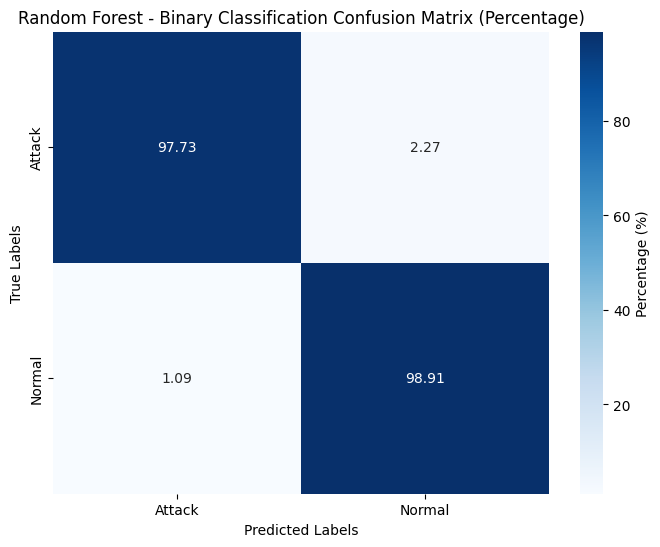

Model saved as rf_binary_model.pkl


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

# 이진 분류의 클래스 라벨을 문자열로 변환하기 위해 LabelEncoder 사용
label_encoder = LabelEncoder()
label_encoder.fit(['Normal', 'Attack'])  # 이진 분류 클래스에 대한 라벨 설정

# 모델 훈련 및 성능 평가
start_train = time.time()
rf_binary = RandomForestClassifier(random_state=42)
rf_binary.fit(X_train_binary_balanced, y_train_binary_balanced)
end_train = time.time()

start_predict = time.time()
y_pred_binary_rf = rf_binary.predict(X_test_binary)
end_predict = time.time()

# 성능 지표 출력
print("Random Forest - Binary Classification Performance:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary_rf))
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary_rf, target_names=label_encoder.classes_))

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary_rf)

# 혼동 행렬을 퍼센트로 변환
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# 혼동 행렬 퍼센트 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Percentage (%)'})
plt.title("Random Forest - Binary Classification Confusion Matrix (Percentage)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 성능 데이터 저장
performance_data.append({
    "Model": "Random Forest",
    "Type": "Binary",
    "Accuracy": accuracy_score(y_test_binary, y_pred_binary_rf),
    "Recall": recall_score(y_test_binary, y_pred_binary_rf),
    "Precision": precision_score(y_test_binary, y_pred_binary_rf),
    "F1-Score": f1_score(y_test_binary, y_pred_binary_rf),
    "Time to Train": end_train - start_train,
    "Time to Predict": end_predict - start_predict,
    "Total Time": (end_train - start_train) + (end_predict - start_predict)
})

# 모델 저장
joblib.dump(rf_binary, '/content/drive/My Drive/UNSW_NB15/rf_binary_model_v3.pkl')
print("Model saved as rf_binary_model.pkl")

Random Forest - Multi-class Classification Performance:
Accuracy: 0.9362104539202201
Classification Report:
                precision    recall  f1-score   support

      Analysis       0.81      0.84      0.82       113
      Backdoor       0.53      0.45      0.49        22
           DoS       0.50      0.54      0.52       502
      Exploits       0.91      0.85      0.88      4296
       Fuzzers       0.94      0.94      0.94       453
       Generic       1.00      0.99      1.00     11591
Reconnaissance       0.49      0.83      0.62       441
         Worms       0.33      0.37      0.35        30

      accuracy                           0.94     17448
     macro avg       0.69      0.73      0.70     17448
  weighted avg       0.94      0.94      0.94     17448



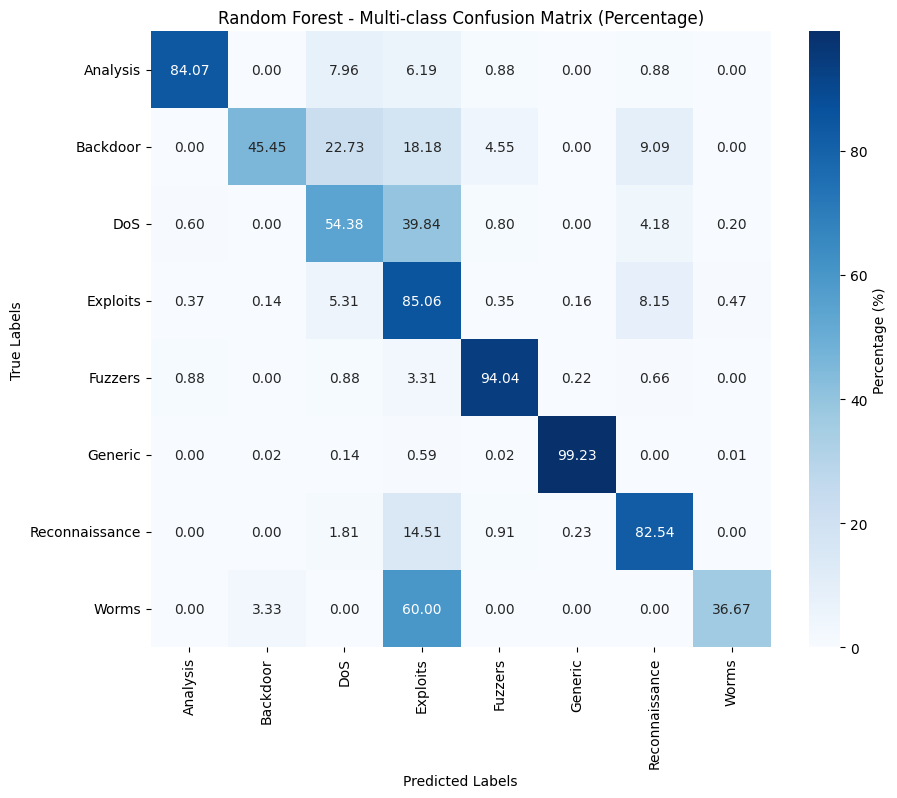

Model saved as rf_multi_model.pkl


In [ ]:
label_decoder = LabelEncoder()
label_decoder.fit(data_multi['attack_cat'])

# 모델 훈련 및 성능 평가
start_train = time.time()
rf_multi = RandomForestClassifier(random_state=42)
rf_multi.fit(X_train_multi_balanced, y_train_multi_balanced)
end_train = time.time()

start_predict = time.time()
y_pred_multi_rf = rf_multi.predict(X_test_multi)
end_predict = time.time()

# 성능 지표 출력
print("Random Forest - Multi-class Classification Performance:")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_multi_rf))
print("Classification Report:")
print(classification_report(y_test_multi, y_pred_multi_rf, target_names=label_decoder.classes_))

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test_multi, y_pred_multi_rf)

# 혼동 행렬을 퍼센트로 변환
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# 퍼센트를 이용한 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=label_decoder.classes_, yticklabels=label_decoder.classes_,
            cbar_kws={'label': 'Percentage (%)'})
plt.title("Random Forest - Multi-class Confusion Matrix (Percentage)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 성능 데이터 저장
performance_data.append({
    "Model": "Random Forest",
    "Type": "Multi-class",
    "Accuracy": accuracy_score(y_test_multi, y_pred_multi_rf),
    "Recall": None,  # Per-class recall can be extracted from classification_report
    "Precision": None,
    "F1-Score": f1_score(y_test_multi, y_pred_multi_rf, average='weighted'),
    "Time to Train": end_train - start_train,
    "Time to Predict": end_predict - start_predict,
    "Total Time": (end_train - start_train) + (end_predict - start_predict)
})

# 모델 저장
joblib.dump(rf_multi, '/content/drive/My Drive/UNSW_NB15/rf_multi_model_v3.pkl')
print("Model saved as rf_multi_model.pkl")

### Extra Trees

Extra Trees - Binary Classification Performance:
Accuracy: 0.9853035967513214
Classification Report:
              precision    recall  f1-score   support

      Attack       0.97      0.97      0.97      5823
      Normal       0.99      0.99      0.99     17448

    accuracy                           0.99     23271
   macro avg       0.98      0.98      0.98     23271
weighted avg       0.99      0.99      0.99     23271



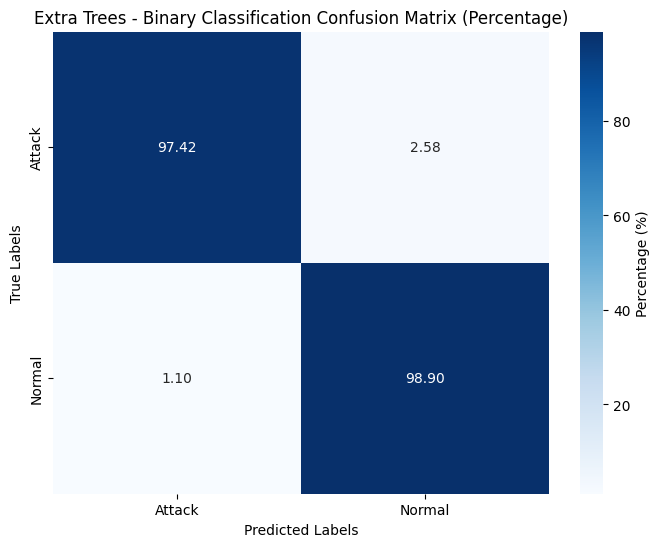

Model saved as et_binary_model.pkl


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# 모델 훈련 및 성능 평가
start_train = time.time()
et_binary = ExtraTreesClassifier(random_state=42)
et_binary.fit(X_train_binary_balanced, y_train_binary_balanced)
end_train = time.time()

start_predict = time.time()
y_pred_binary_et = et_binary.predict(X_test_binary)
end_predict = time.time()

# 성능 지표 출력
print("Extra Trees - Binary Classification Performance:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary_et))
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary_et, target_names=label_encoder.classes_))

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary_et)

# 혼동 행렬을 퍼센트로 변환
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# 혼동 행렬 퍼센트 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Percentage (%)'})
plt.title("Extra Trees - Binary Classification Confusion Matrix (Percentage)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 성능 데이터 저장
performance_data.append({
    "Model": "Extra Trees",
    "Type": "Binary",
    "Accuracy": accuracy_score(y_test_binary, y_pred_binary_et),
    "Recall": recall_score(y_test_binary, y_pred_binary_et),
    "Precision": precision_score(y_test_binary, y_pred_binary_et),
    "F1-Score": f1_score(y_test_binary, y_pred_binary_et),
    "Time to Train": end_train - start_train,
    "Time to Predict": end_predict - start_predict,
    "Total Time": (end_train - start_train) + (end_predict - start_predict)
})

# 모델 저장
joblib.dump(et_binary, '/content/drive/My Drive/UNSW_NB15/et_binary_model_v3.pkl')
print("Model saved as et_binary_model.pkl")

Extra Trees - Multi-class Classification Performance:
Accuracy: 0.9327716643741403
Classification Report:
                precision    recall  f1-score   support

      Analysis       0.77      0.85      0.81       113
      Backdoor       0.50      0.36      0.42        22
           DoS       0.47      0.49      0.48       502
      Exploits       0.90      0.85      0.87      4296
       Fuzzers       0.92      0.94      0.93       453
       Generic       1.00      0.99      0.99     11591
Reconnaissance       0.48      0.80      0.60       441
         Worms       0.31      0.30      0.31        30

      accuracy                           0.93     17448
     macro avg       0.67      0.70      0.68     17448
  weighted avg       0.94      0.93      0.94     17448



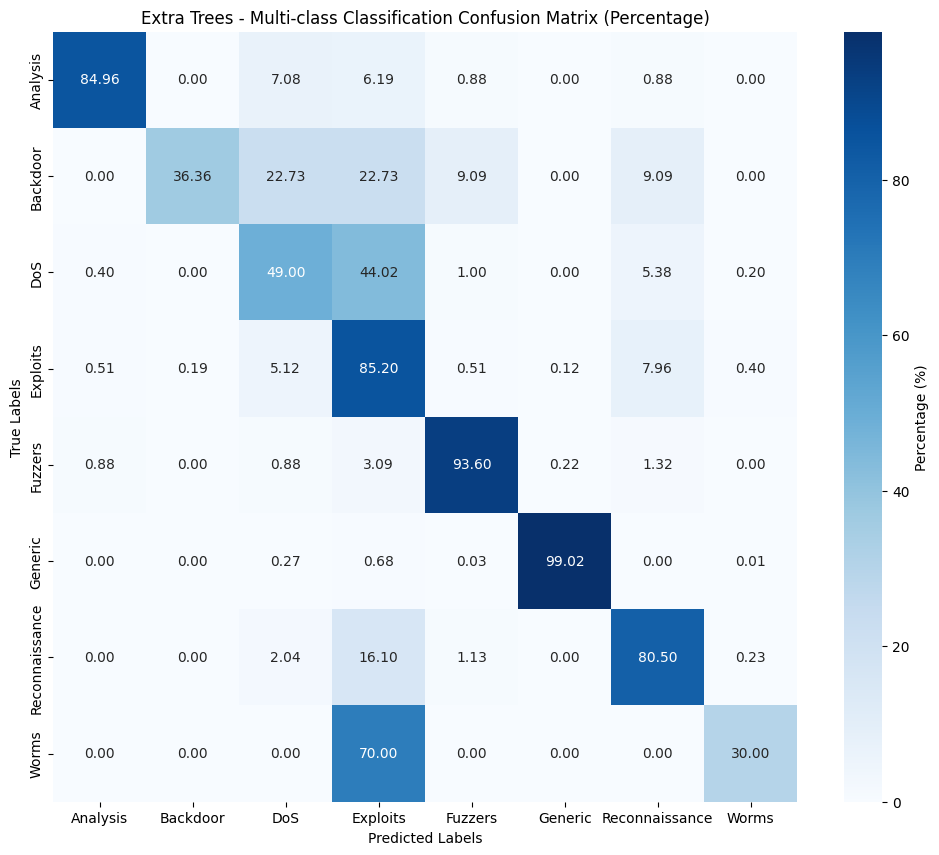

Model saved as et_multi_model.pkl


In [ ]:
# 모델 훈련 및 성능 평가
start_train = time.time()
et_multi = ExtraTreesClassifier(random_state=42)
et_multi.fit(X_train_multi_balanced, y_train_multi_balanced)
end_train = time.time()

start_predict = time.time()
y_pred_multi_et = et_multi.predict(X_test_multi)
end_predict = time.time()

# 성능 지표 출력
print("Extra Trees - Multi-class Classification Performance:")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_multi_et))
print("Classification Report:")
print(classification_report(y_test_multi, y_pred_multi_et, target_names=label_decoder.classes_))

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test_multi, y_pred_multi_et)

# 혼동 행렬을 퍼센트로 변환
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# 혼동 행렬 퍼센트 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=label_decoder.classes_, yticklabels=label_decoder.classes_,
            cbar_kws={'label': 'Percentage (%)'})
plt.title("Extra Trees - Multi-class Classification Confusion Matrix (Percentage)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 성능 데이터 저장
performance_data.append({
    "Model": "Extra Trees",
    "Type": "Multi-class",
    "Accuracy": accuracy_score(y_test_multi, y_pred_multi_et),
    "Recall": None,
    "Precision": None,
    "F1-Score": f1_score(y_test_multi, y_pred_multi_et, average='weighted'),
    "Time to Train": end_train - start_train,
    "Time to Predict": end_predict - start_predict,
    "Total Time": (end_train - start_train) + (end_predict - start_predict)
})

# 모델 저장
joblib.dump(et_multi, '/content/drive/My Drive/UNSW_NB15/et_multi_model_v3.pkl')
print("Model saved as et_multi_model.pkl")

### LSTM

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import time

# 데이터 3D로 변환 (LSTM 입력 형식에 맞게 변환)
X_train_binary_lstm = X_train_binary_balanced.values.reshape(X_train_binary_balanced.shape[0], 1, X_train_binary_balanced.shape[1])
X_test_binary_lstm = X_test_binary.values.reshape(X_test_binary.shape[0], 1, X_test_binary.shape[1])

# 모델 훈련 및 성능 평가
start_train = time.time()

# LSTM 모델 정의
lstm_binary = Sequential([
    LSTM(64, input_shape=(1, X_train_binary_balanced.shape[1]), return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
lstm_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 훈련 (검증 세트를 사용하여 성능 평가)
history = lstm_binary.fit(
    X_train_binary_lstm, y_train_binary_balanced,
    epochs=50, batch_size=64,
    validation_split=0.2,  # 20%의 데이터를 검증 세트로 사용
    verbose=1
)

end_train = time.time()

# 예측
start_predict = time.time()
lstm_binary_loss, lstm_binary_accuracy = lstm_binary.evaluate(X_test_binary_lstm, y_test_binary)
end_predict = time.time()

print("LSTM - Binary Classification Performance:")
print("Test Accuracy:", lstm_binary_accuracy)
print("Test Loss:", lstm_binary_loss)

# 훈련 중 성능 추적
print("Training History - Loss and Accuracy:")
print("Training Loss:", history.history['loss'][-1])  # 마지막 에포크의 훈련 손실
print("Training Accuracy:", history.history['accuracy'][-1])  # 마지막 에포크의 훈련 정확도
print("Validation Loss:", history.history['val_loss'][-1])  # 마지막 에포크의 검증 손실
print("Validation Accuracy:", history.history['val_accuracy'][-1])  # 마지막 에포크의 검증 정확도

# 성능 데이터 저장
performance_data.append({
    "Model": "LSTM",
    "Type": "Binary",
    "Accuracy": lstm_binary_accuracy,
    "Recall": None,  # F1, Recall 등 추가적으로 계산해야 하는 경우
    "Precision": None,
    "F1-Score": None,
    "Time to Train": end_train - start_train,
    "Time to Predict": end_predict - start_predict,
    "Total Time": (end_train - start_train) + (end_predict - start_predict)
})

# 모델 저장
lstm_binary.save('/content/drive/My Drive/UNSW_NB15/lstm_binary_model_v3.h5')
print("Model saved as lstm_binary_model_with_validation.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9215 - loss: 0.1855 - val_accuracy: 0.9510 - val_loss: 0.0907
Epoch 2/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9691 - loss: 0.0670 - val_accuracy: 0.9516 - val_loss: 0.0920
Epoch 3/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9721 - loss: 0.0613 - val_accuracy: 0.9547 - val_loss: 0.0930
Epoch 4/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9714 - loss: 0.0620 - val_accuracy: 0.9609 - val_loss: 0.0785
Epoch 5/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9716 - loss: 0.0598 - val_accuracy: 0.9675 - val_loss: 0.0791
Epoch 6/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9731 - loss: 0.0575 - val_accuracy: 0.9700 - val_loss: 0.0631
Epoch 7/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9742 - loss: 0.0556 - val_accuracy: 0.9720 - val_loss: 0.0769
Epoch 8/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9746 - loss: 0

LSTM - Binary Classification Performance:
Test Accuracy: 0.9782132506370544
Test Loss: 0.05131567269563675
Training History - Loss and Accuracy:
Training Loss: 0.03891727700829506
Training Accuracy: 0.9830296039581299
Validation Loss: 0.04175931587815285
Validation Accuracy: 0.9888956546783447
Model saved as lstm_binary_model_with_validation.h5


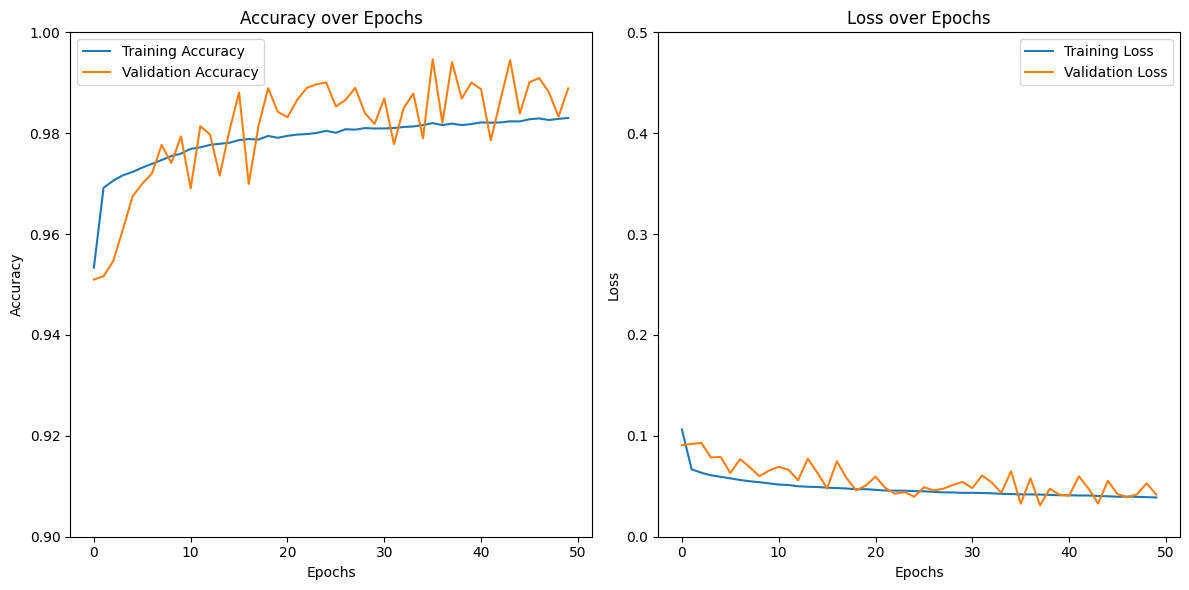

In [ ]:
# 훈련 완료 후 그래프 그리기
import matplotlib.pyplot as plt

# 정확도 그래프
plt.figure(figsize=(12, 6))

# 훈련 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.90, 1.0)
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.0, 0.50)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

end_train = time.time()

In [ ]:
# 데이터 3D로 변환 (LSTM 입력 형식에 맞게 변환)
X_train_multi_lstm = X_train_multi_balanced.values.reshape(X_train_multi_balanced.shape[0], 1, X_train_multi_balanced.shape[1])
X_test_multi_lstm = X_test_multi.values.reshape(X_test_multi.shape[0], 1, X_test_multi.shape[1])

# 모델 훈련 및 성능 평가
start_train = time.time()

# LSTM 모델 정의
lstm_multi = Sequential([
    LSTM(64, input_shape=(1, X_train_multi_balanced.shape[1]), return_sequences=True),
    LSTM(32),
    Dense(len(np.unique(y_train_multi_balanced)), activation='softmax')
])

# 모델 컴파일
lstm_multi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련 (검증 세트를 사용하여 성능 평가)
history = lstm_multi.fit(
    X_train_multi_lstm, y_train_multi_balanced,
    epochs=50, batch_size=64,
    validation_split=0.2,  # 20%의 데이터를 검증 세트로 사용
    verbose=1
)

end_train = time.time()

# 예측
start_predict = time.time()
lstm_multi_loss, lstm_multi_accuracy = lstm_multi.evaluate(X_test_multi_lstm, y_test_multi)
end_predict = time.time()

print("LSTM - Multi-class Classification Performance:")
print("Test Accuracy:", lstm_multi_accuracy)
print("Test Loss:", lstm_multi_loss)

# 훈련 중 성능 추적
print("Training History - Loss and Accuracy:")
print("Training Loss:", history.history['loss'][-1])  # 마지막 에포크의 훈련 손실
print("Training Accuracy:", history.history['accuracy'][-1])  # 마지막 에포크의 훈련 정확도
print("Validation Loss:", history.history['val_loss'][-1])  # 마지막 에포크의 검증 손실
print("Validation Accuracy:", history.history['val_accuracy'][-1])  # 마지막 에포크의 검증 정확도

# 성능 데이터 저장
performance_data.append({
    "Model": "LSTM",
    "Type": "Multi-class",
    "Accuracy": lstm_multi_accuracy,
    "Recall": None,  # F1, Recall 등 추가적으로 계산해야 하는 경우
    "Precision": None,
    "F1-Score": None,
    "Time to Train": end_train - start_train,
    "Time to Predict": end_predict - start_predict,
    "Total Time": (end_train - start_train) + (end_predict - start_predict)
})

# 모델 저장
lstm_multi.save('/content/drive/My Drive/UNSW_NB15/lstm_multi_model_v3.h5')
print("Model saved as lstm_multi_model_with_validation.h5")

Epoch 1/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 51s 9ms/step - accuracy: 0.7130 - loss: 0.8016 - val_accuracy: 0.2901 - val_loss: 4.2514
Epoch 2/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.8371 - loss: 0.4422 - val_accuracy: 0.2656 - val_loss: 3.8540
Epoch 3/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8640 - loss: 0.3686 - val_accuracy: 0.3183 - val_loss: 3.4678
Epoch 4/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8757 - loss: 0.3318 - val_accuracy: 0.3051 - val_loss: 3.0394
Epoch 5/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8830 - loss: 0.3064 - val_accuracy: 0.3328 - val_loss: 2.9663
Epoch 6/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.8902 - loss: 0.2889 - val_accuracy: 0.3577 - val_loss: 2.9570
Epoch 7/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8955 - loss: 0.2733 - val_accuracy: 0.3854 - val_loss: 2.6624
Epoch 8/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - accuracy: 0.9003 - loss: 0

LSTM - Multi-class Classification Performance:
Test Accuracy: 0.9115085005760193
Test Loss: 0.31205299496650696
Training History - Loss and Accuracy:
Training Loss: 0.12548290193080902
Training Accuracy: 0.9545791745185852
Validation Loss: 2.281590223312378
Validation Accuracy: 0.4398792088031769
Model saved as lstm_multi_model_with_validation.h5


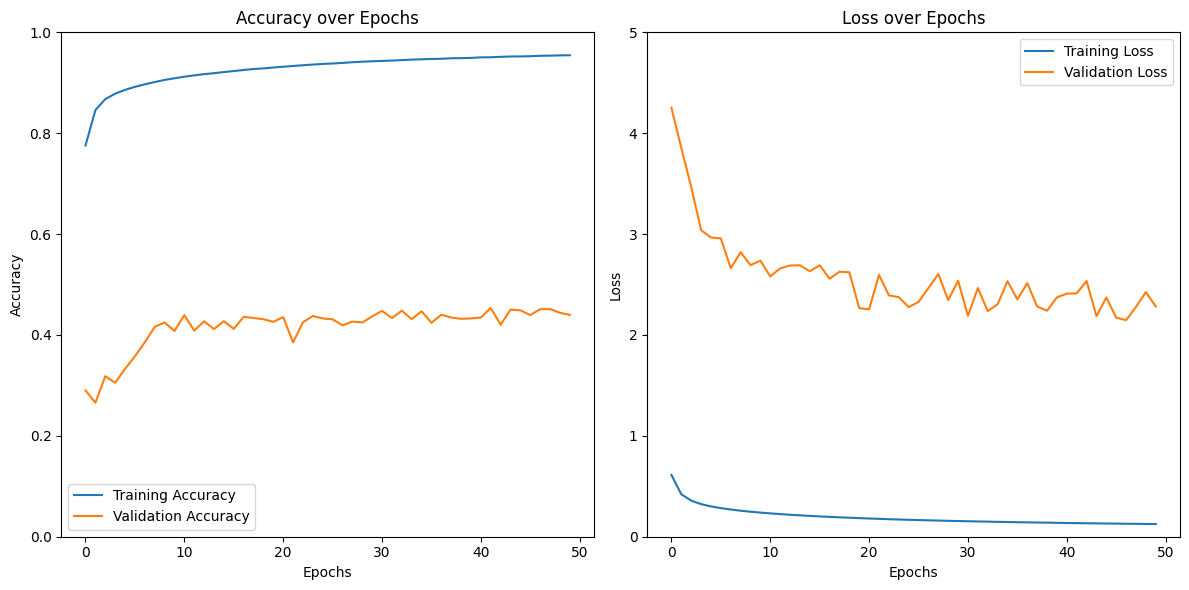

In [ ]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.figure(figsize=(12, 6))

# 훈련 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.0, 5)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

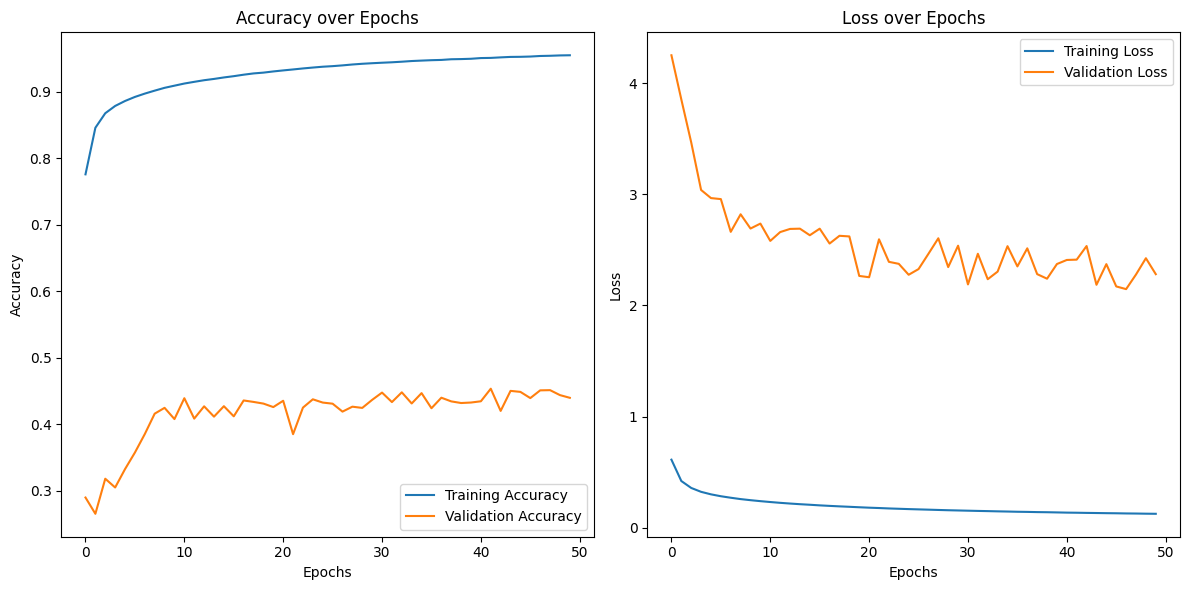

In [ ]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.figure(figsize=(12, 6))

# 훈련 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

### GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
import time
import numpy as np

# 데이터 3D로 변환
X_train_binary_gru = X_train_binary_balanced.values.reshape(X_train_binary_balanced.shape[0], 1, X_train_binary_balanced.shape[1])
X_test_binary_gru = X_test_binary.values.reshape(X_test_binary.shape[0], 1, X_test_binary.shape[1])

# 모델 훈련 및 성능 평가
start_train = time.time()
gru_binary = Sequential([
    GRU(64, input_shape=(1, X_train_binary_balanced.shape[1]), return_sequences=True),
    GRU(32),
    Dense(1, activation='sigmoid')
])
gru_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 훈련 (검증 데이터 추가)
history_binary = gru_binary.fit(
    X_train_binary_gru, y_train_binary_balanced,
    epochs=50, batch_size=64,
    validation_split=0.2,  # 훈련 데이터의 20%를 검증 세트로 사용
    verbose=1
)
end_train = time.time()

# 예측
start_predict = time.time()
gru_binary_loss, gru_binary_accuracy = gru_binary.evaluate(X_test_binary_gru, y_test_binary)
end_predict = time.time()

print("GRU - Binary Classification Performance:")
print("Test Accuracy:", gru_binary_accuracy)
print("Test Loss:", gru_binary_loss)

# 훈련 및 검증 결과 출력
print("Training History - Binary Classification:")
print("Training Loss:", history_binary.history['loss'][-1])
print("Training Accuracy:", history_binary.history['accuracy'][-1])
print("Validation Loss:", history_binary.history['val_loss'][-1])
print("Validation Accuracy:", history_binary.history['val_accuracy'][-1])

# 성능 데이터 저장
performance_data.append({
    "Model": "GRU",
    "Type": "Binary",
    "Accuracy": gru_binary_accuracy,
    "Recall": None,
    "Precision": None,
    "F1-Score": None,
    "Time to Train": end_train - start_train,
    "Time to Predict": end_predict - start_predict,
    "Total Time": (end_train - start_train) + (end_predict - start_predict)
})

# 모델 저장
gru_binary.save('/content/drive/My Drive/UNSW_NB15/gru_binary_model_v3.h5')
print("Model saved as gru_binary_model_with_validation.h5")

Epoch 1/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9366 - loss: 0.1558 - val_accuracy: 0.9438 - val_loss: 0.1075
Epoch 2/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9683 - loss: 0.0699 - val_accuracy: 0.9348 - val_loss: 0.1214
Epoch 3/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9703 - loss: 0.0654 - val_accuracy: 0.9445 - val_loss: 0.1113
Epoch 4/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9707 - loss: 0.0631 - val_accuracy: 0.9533 - val_loss: 0.0923
Epoch 5/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9724 - loss: 0.0606 - val_accuracy: 0.9644 - val_loss: 0.0722
Epoch 6/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9737 - loss: 0.0581 - val_accuracy: 0.9745 - val_loss: 0.0703
Epoch 7/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9747 - loss: 0.0572 - val_accuracy: 0.9823 - val_loss: 0.0533
Epoch 8/50
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9743 - loss: 0

GRU - Binary Classification Performance:
Test Accuracy: 0.9787288904190063
Test Loss: 0.05102630704641342
Training History - Binary Classification:
Training Loss: 0.03699129819869995
Training Accuracy: 0.9839788675308228
Validation Loss: 0.04681619629263878
Validation Accuracy: 0.9857434630393982
Model saved as gru_binary_model_with_validation.h5


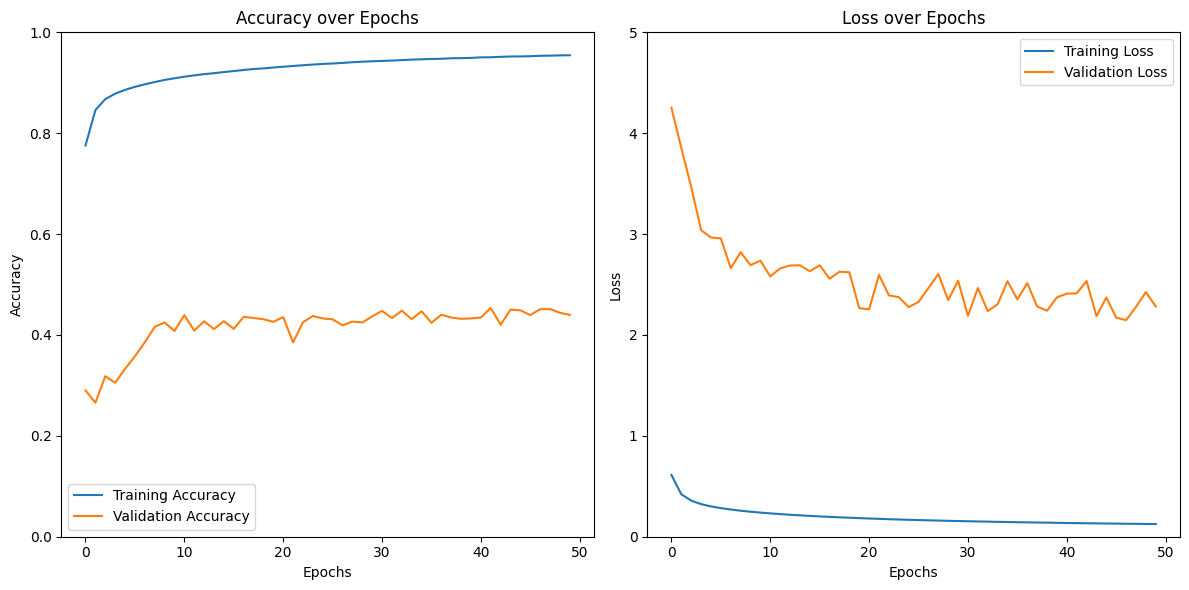

In [ ]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.figure(figsize=(12, 6))

# 훈련 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.0, 5)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
# 데이터 3D로 변환
X_train_multi_gru = X_train_multi_balanced.values.reshape(X_train_multi_balanced.shape[0], 1, X_train_multi_balanced.shape[1])
X_test_multi_gru = X_test_multi.values.reshape(X_test_multi.shape[0], 1, X_test_multi.shape[1])

# 모델 훈련 및 성능 평가
start_train = time.time()
gru_multi = Sequential([
    GRU(64, input_shape=(1, X_train_multi_balanced.shape[1]), return_sequences=True),
    GRU(32),
    Dense(len(np.unique(y_train_multi_balanced)), activation='softmax')
])
gru_multi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련 (검증 데이터 추가)
history_multi = gru_multi.fit(
    X_train_multi_gru, y_train_multi_balanced,
    epochs=50, batch_size=64,
    validation_split=0.2,  # 훈련 데이터의 20%를 검증 세트로 사용
    verbose=1
)
end_train = time.time()

# 예측
start_predict = time.time()
gru_multi_loss, gru_multi_accuracy = gru_multi.evaluate(X_test_multi_gru, y_test_multi)
end_predict = time.time()

print("GRU - Multi-class Classification Performance:")
print("Test Accuracy:", gru_multi_accuracy)
print("Test Loss:", gru_multi_loss)

# 훈련 및 검증 결과 출력
print("Training History - Multi-class Classification:")
print("Training Loss:", history_multi.history['loss'][-1])
print("Training Accuracy:", history_multi.history['accuracy'][-1])
print("Validation Loss:", history_multi.history['val_loss'][-1])
print("Validation Accuracy:", history_multi.history['val_accuracy'][-1])

# 성능 데이터 저장
performance_data.append({
    "Model": "GRU",
    "Type": "Multi-class",
    "Accuracy": gru_multi_accuracy,
    "Recall": None,
    "Precision": None,
    "F1-Score": None,
    "Time to Train": end_train - start_train,
    "Time to Predict": end_predict - start_predict,
    "Total Time": (end_train - start_train) + (end_predict - start_predict)
})

# 모델 저장
gru_multi.save('/content/drive/My Drive/UNSW_NB15/gru_multi_model_v3.h5')
print("Model saved as gru_multi_model_with_validation.h5")

Epoch 1/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.7159 - loss: 0.7803 - val_accuracy: 0.2442 - val_loss: 4.0639
Epoch 2/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8351 - loss: 0.4467 - val_accuracy: 0.2880 - val_loss: 3.6478
Epoch 3/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.8604 - loss: 0.3758 - val_accuracy: 0.4376 - val_loss: 2.9756
Epoch 4/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8758 - loss: 0.3310 - val_accuracy: 0.3563 - val_loss: 3.0888
Epoch 5/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.8841 - loss: 0.3048 - val_accuracy: 0.3661 - val_loss: 2.6548
Epoch 6/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8916 - loss: 0.2850 - val_accuracy: 0.4306 - val_loss: 2.5474
Epoch 7/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8960 - loss: 0.2713 - val_accuracy: 0.3791 - val_loss: 2.5682
Epoch 8/50
4637/4637 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.8994 - loss: 0

GRU - Multi-class Classification Performance:
Test Accuracy: 0.9049174785614014
Test Loss: 0.3249717652797699
Training History - Multi-class Classification:
Training Loss: 0.13179484009742737
Training Accuracy: 0.9514652490615845
Validation Loss: 2.4585607051849365
Validation Accuracy: 0.41077589988708496
Model saved as gru_multi_model_with_validation.h5


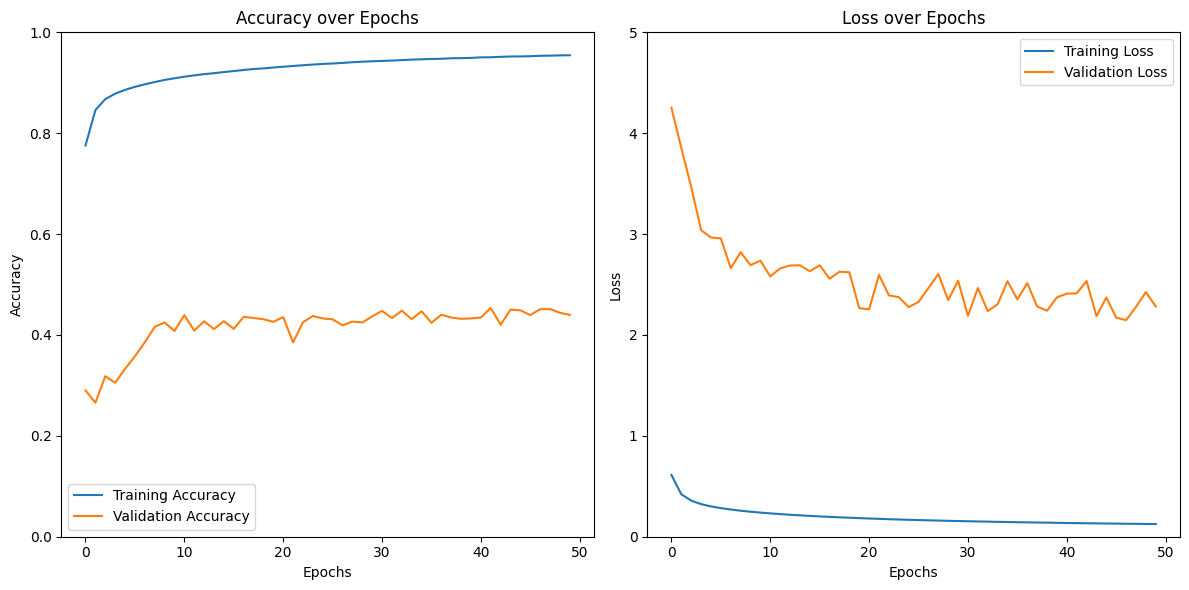

In [ ]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.figure(figsize=(12, 6))

# 훈련 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 5)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

## 성능 비교

In [ ]:
# performance_data가 리스트일 경우, DataFrame으로 변환
performance_df = pd.DataFrame(performance_data)

# 성능 데이터프레임 스타일링
styled_table = (
    performance_df.style
    .background_gradient(cmap="coolwarm_r", subset=["Accuracy"])  # 정확도: 낮을수록 warm (빨간색), 높을수록 cool (파란색)
    .background_gradient(cmap="coolwarm", subset=["Time to Train", "Total Time"])  # 시간: 낮을수록 cool (파란색), 높을수록 warm (빨간색)
    .format({"Accuracy": "{:.4%}", "Time to Train": "{:.2f}", "Total Time": "{:.2f}"})
    .set_caption("Model Performance Summary")
)

# 테이블 출력
styled_table

,Model,Type,Accuracy,Recall,Precision,F1-Score,Time to Train,Time to Predict,Total Time
0,Random Forest,Binary,98.6120%,0.989053,0.992409,0.990728,30.89,0.331052,31.22
1,Random Forest,Multi-class,93.6210%,nan,nan,0.939169,302.54,0.334587,302.88
2,Extra Trees,Binary,98.5304%,0.988996,0.991382,0.990188,13.27,0.514757,13.78
3,Extra Trees,Multi-class,93.2772%,nan,nan,0.935549,76.66,0.453404,77.11
4,LSTM,Binary,97.8213%,nan,nan,nan,645.68,1.885014,647.57
5,LSTM,Multi-class,91.1509%,nan,nan,nan,1755.82,2.685532,1758.51
6,GRU,Binary,97.8729%,nan,nan,nan,755.38,1.539457,756.92
7,GRU,Multi-class,90.4917%,nan,nan,nan,1769.36,1.359433,1770.72
